In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder





def save_data(test_x, test_y, fname='data'):
    data_dict = {'test_x': test_x, 'test_y': test_y}
    np.savez(f'{fname}.npz', **data_dict)

def load_data(fname='data'):
    loaded = np.load(f'{fname}.npz')
    return loaded['test_x'], loaded['test_y']


higgs_boson_train = pd.read_csv("notebooks/higgs-boson/training.csv")

# use all features (other than EventId and weight), we will apply PCA to reduce dimensionality
higgs_boson_train_simple = higgs_boson_train.copy()
higgs_boson_train_simple.drop(['EventId', 'Weight'], axis=1)
df = higgs_boson_train_simple

# Preprocessing
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

X = df.drop('Label', axis=1)
y = df['Label']

# Applying PCA to reduce features to 6
pca = PCA(n_components=6)
X = pd.DataFrame(pca.fit_transform(X))

# normalise inputs to be between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cut down amount of training data so runs quickly
# X_train = X_train[:1000]
# y_train = y_train[:1000]

#save_data(X_test, y_test, 'data_higgs')


In [3]:
X.head()

,0,1,2,3,4,5
0,1.000000,0.207178,-0.188333,0.044882,-0.947905,-0.508923
1,0.999992,-0.678031,0.684430,0.067614,-0.819877,-0.485814
2,0.999984,-0.702274,0.578342,-0.957890,-0.805109,-0.412240
3,0.999976,-0.970260,-0.431547,0.278227,-0.827368,-0.466293
4,0.999968,-0.970444,-0.428812,0.309567,-0.829615,-0.483242


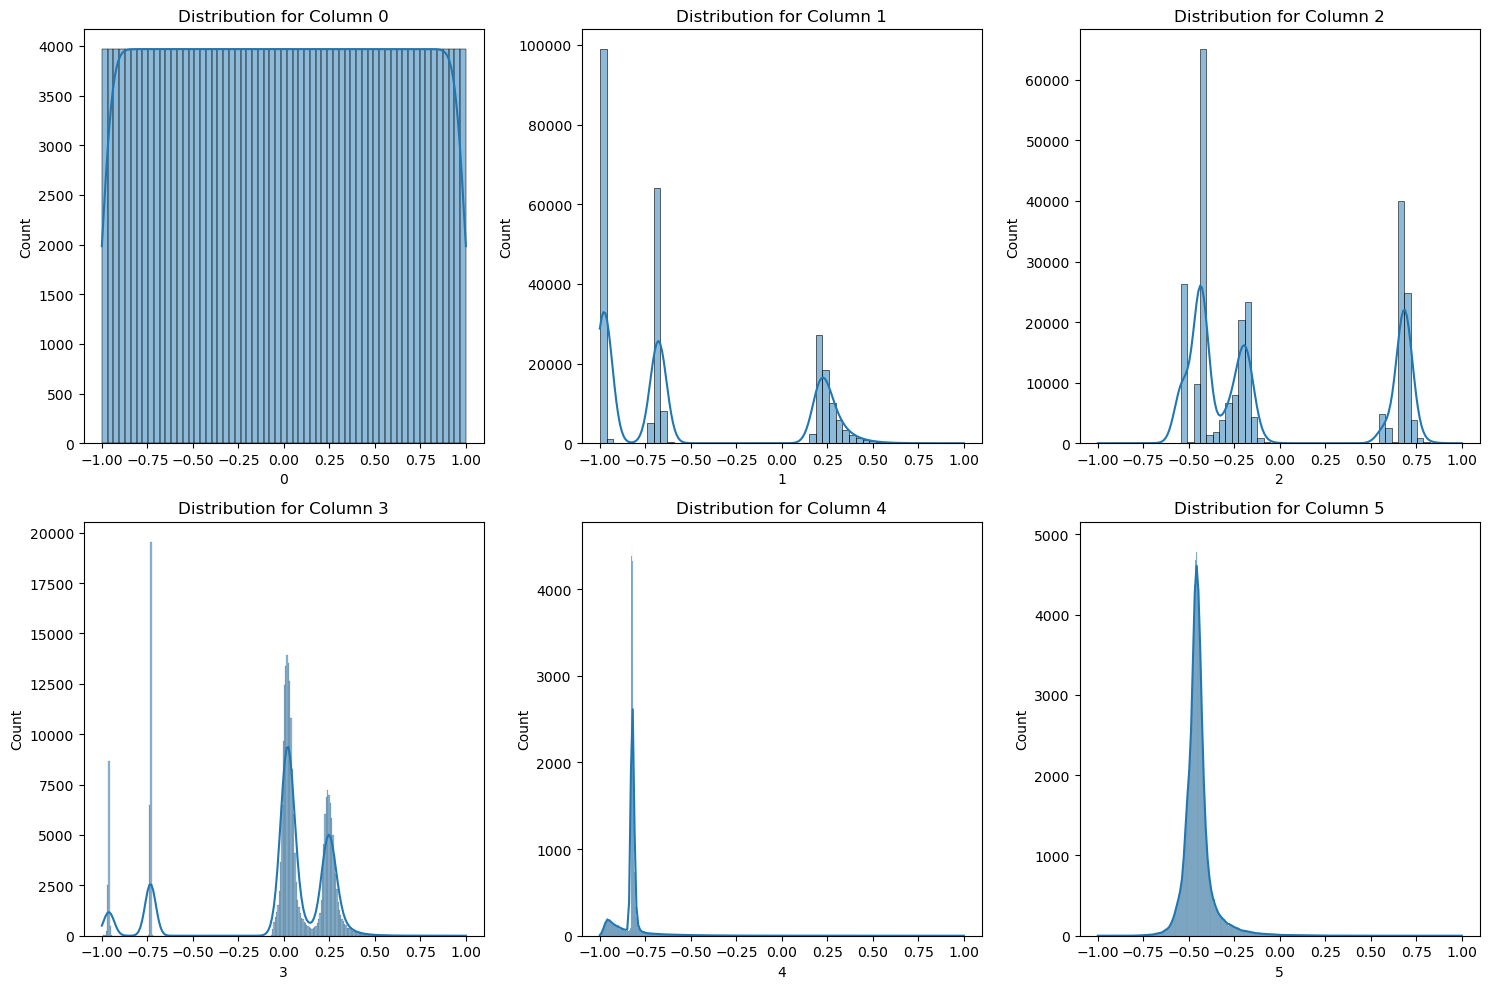

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = X

# Plot distribution for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution for Column {column}")

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Sample data


df_odd = X

# Shuffle each column independently
for col in df_odd.columns:
    df_odd[col] = np.random.permutation(df_odd[col].values)

print(df_odd.head())


          0         1         2         3         4         5
0  0.459646  0.228059 -0.536292  0.033294 -0.821975 -0.450972
1 -0.037292 -0.971838 -0.427584  0.051432 -0.816047 -0.512757
2 -0.753831 -0.637790 -0.432798  0.217257 -0.804499 -0.439644
3  0.550390 -0.968177  0.841797 -0.957267 -0.777665 -0.514846
4  0.016772 -0.967443 -0.210227  0.018654 -0.824081 -0.456877


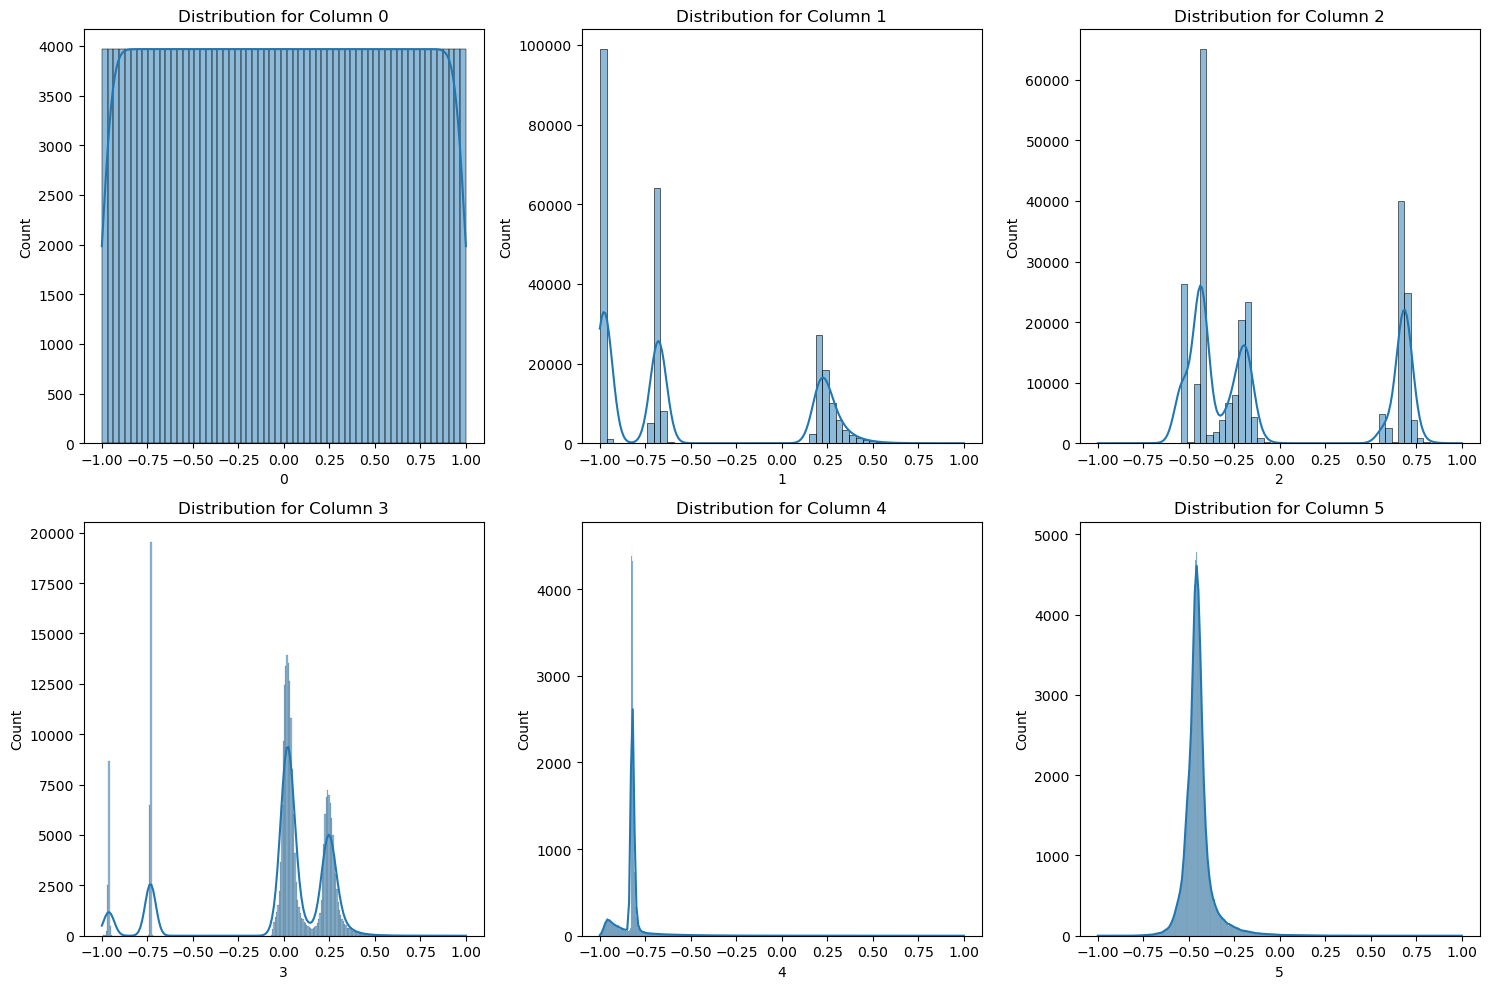

In [6]:

# Plot distribution for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_odd.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_odd[column], kde=True)
    plt.title(f"Distribution for Column {column}")

plt.tight_layout()
plt.show()

In [18]:
X_test, y_test = load_data('data_higgs')

# Shuffle each column independently
for i in range(X_test.shape[1]):
    X_test[:, i] = np.random.permutation(X_test[:, i])

y_test = np.random.permutation(y_test)

save_data(X_test, y_test, 'data_higgs_ood')